In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys
sys.path.insert(0, '..//')

c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\notebooks
c:
Users
sceac10
c:\sceac10\


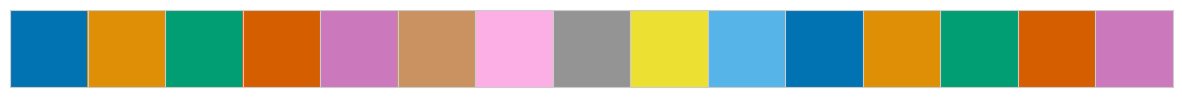

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys
import random

from src.common import enums
from pathlib import Path

random.seed(42)

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
export_fig_format = "pdf"
fig_format = "png"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)
sns.palplot(sns.color_palette())

markers = ['P', 'o', '^', 's', '*', 'v']
linewidth = 0.1
edgecolor = 'black'

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)


In [19]:
PATH_CIBSE_DATA = Path(r"C:\Users\sceac10\OneDrive - Cardiff University\General\data\CIBSE weather data\WD16SET\WD16SET\WDD16SET\WDD16SET\WMD16SET\WMD16SET")
PATH_SAVE_FIGURES = Path(r"C:\Users\sceac10\OneDrive - Cardiff University\General\communication\figures")

In [20]:
column_names = [
  'Year', 'Month', 'Day', 'Hour', 'PWC', 'Cloud', 'DBT', 'WBT', 'RH', 'Press', 'WD', 'WS', 'GSR', 'DSR', 'Alt', 'Dec', 'Cloud1', 'DBT1', 'WBT1', 'Press1', 'WD1', 'WS1'
]
pathlist = Path(PATH_CIBSE_DATA).rglob('Cardiff_DSY2_2050High*.csv')

frames = {}

for path in pathlist:
  print(path.stem)
  temp_dataf = pd.read_csv(path, skiprows=32, header=None, delimiter=",", names=column_names)
  frames[path.stem] = temp_dataf['DBT'].values

Cardiff_DSY2_2050High10_
Cardiff_DSY2_2050High50_
Cardiff_DSY2_2050High90_


In [21]:
temperature_df = pd.DataFrame(frames, index=pd.to_datetime(temp_dataf[['Year', 'Month', 'Day', 'Hour']]))
temperature_df['Max'] = temperature_df.max(axis=1)
temperature_df['Min'] = temperature_df.min(axis=1)
temperature_df['Median'] = temperature_df[[x for x in temperature_df.columns if "High50_" in x]].values.flatten()

Text(0.5, 1.0, 'Temperature intervals [10,90] in Cardiff in 2050 under a high emission scenario')

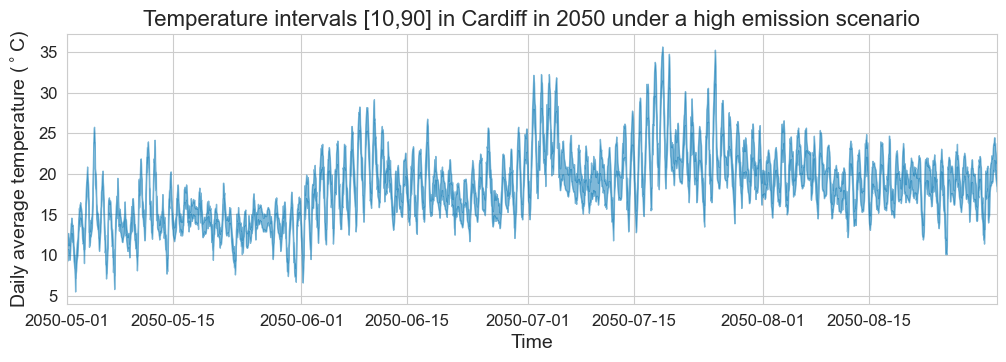

In [22]:
fig, ax = plt.subplots(figsize=figsize)

to_plot_df = temperature_df.copy()
filt = (to_plot_df.index.month>=5) & (to_plot_df.index.month<9)
to_plot_df = to_plot_df[filt]
# temperature_df['Median'].plot(ax=ax, linewidth=0.1, color='black')
ax.fill_between(to_plot_df.index, to_plot_df['Max'],to_plot_df['Min'], color = sns.color_palette()[0], alpha=0.5)
ax.margins(0, None)
ax.set_xlabel("Time")
ax.set_ylabel("Daily average temperature ($^\circ$C)")
ax.set_title("Temperature intervals [10,90] in Cardiff in 2050 under a high emission scenario")

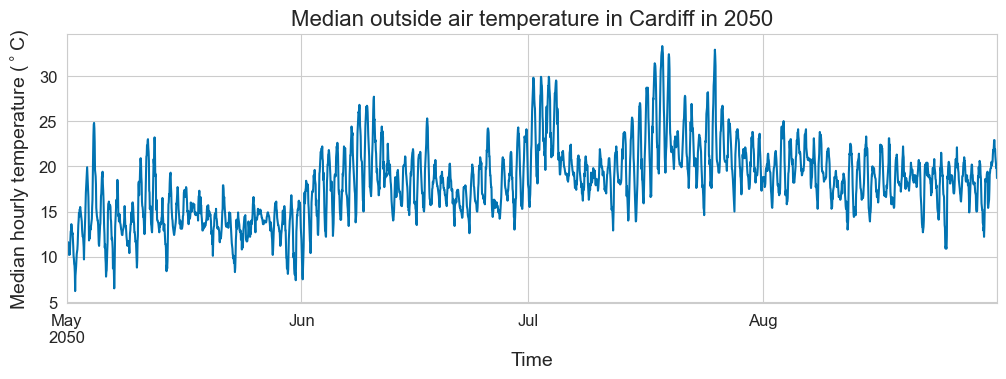

In [26]:
fig, ax = plt.subplots(figsize=figsize)

to_plot_df = temperature_df.copy()
filt = (to_plot_df.index.month>=5) & (to_plot_df.index.month<9)
to_plot_df = to_plot_df[filt]
# temperature_df['Median'].plot(ax=ax, linewidth=0.1, color='black')
# ax.fill_between(to_plot_df.index, to_plot_df['Max'],to_plot_df['Min'], color = sns.color_palette()[0], alpha=0.5)
to_plot_df['Median'].plot(ax=ax)
ax.margins(0, None)
ax.set_xlabel("Time")
ax.set_ylabel("Median hourly temperature ($^\circ$C)")
ax.set_title("Median outside air temperature in Cardiff in 2050")
fig.savefig(PATH_SAVE_FIGURES/f"2050_temperature_Cardiff.{fig_format}", bbox_inches='tight', format=fig_format, dpi=dpi)
fig.savefig(PATH_SAVE_FIGURES/f"2050_temperature_Cardiff.{export_fig_format}", bbox_inches='tight', format=export_fig_format, dpi=dpi)

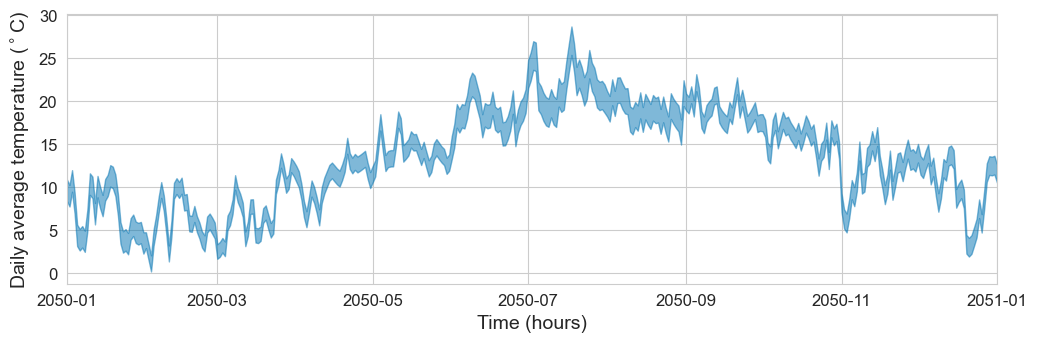

In [24]:
fig, ax = plt.subplots(figsize=figsize)

daily_temperature = temperature_df.resample('1d').mean()

# temperature_df['Median'].plot(ax=ax, linewidth=0.1, color='black')
ax.fill_between(daily_temperature.index, daily_temperature['Max'],daily_temperature['Min'], color = sns.color_palette()[0], alpha=0.5)
ax.margins(0, None)
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Daily average temperature ($^\circ$C)")

fig.savefig(PATH_SAVE_FIGURES/f"dwelling_projections.{fig_format}", bbox_inches='tight', format=fig_format, dpi=dpi)
fig.savefig(PATH_SAVE_FIGURES/f"dwelling_projections.{export_fig_format}", bbox_inches='tight', format=export_fig_format, dpi=dpi)